# Technical Challenge: HCC Survival Dataset
## Data exploration
Author: Kim Phan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
columns = [
    "male", "symptoms", "alcohol",
    "hepBsAg", "hepBeAg", "hepBcAb", "hepBvAb",
    "cirrhosis", "endemic", "smoking", "diabetes", "obesity",
    "hemochromatosis", "hypertension", "renalInsufficiency", "hiv",
    "nash", "varices", "splenomegaly", "portalHypertension", "pvt",
    "metastasis", "hallmark",
    "age",
    "alcohol_g", "smoking_pack",
    "performance", "encephalopathy", "ascites",
    "inr", "afp", "hb", "mcv", "leuk", "plt", "albumin",
    "bilirubin_total", "alt", "ast", "ggt", "alp", "protein_total",
    "creatinine",
    "nodule_no",
    "nodule_dim", "bilirubin_direct", "iron", "o2sat", "ferritin",
    "lives"
]

In [3]:
data = pd.read_csv(
    './Test project/hcc-data.txt', 
    names = columns, 
    header = None, 
    na_values = ['?']
)
data.dataframeName = 'hcc-data.txt'

# Peek at the data

In [4]:
data.head()

,male,symptoms,alcohol,hepBsAg,hepBeAg,hepBcAb,hepBvAb,cirrhosis,endemic,smoking,...,alp,protein_total,creatinine,nodule_no,nodule_dim,bilirubin_direct,iron,o2sat,ferritin,lives
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1


In [6]:
print(data.shape)

(165, 50)


This dataset contains 50 variables (including "survival") collected from 165 patients.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
male                  165 non-null int64
symptoms              147 non-null float64
alcohol               165 non-null int64
hepBsAg               148 non-null float64
hepBeAg               126 non-null float64
hepBcAb               141 non-null float64
hepBvAb               156 non-null float64
cirrhosis             165 non-null int64
endemic               126 non-null float64
smoking               124 non-null float64
diabetes              162 non-null float64
obesity               155 non-null float64
hemochromatosis       142 non-null float64
hypertension          162 non-null float64
renalInsufficiency    163 non-null float64
hiv                   151 non-null float64
nash                  143 non-null float64
varices               113 non-null float64
splenomegaly          150 non-null float64
portalHypertension    154 non-null float64
pvt                   162 non-null float6

In [8]:
data.isnull().sum(axis=0)

male                   0
symptoms              18
alcohol                0
hepBsAg               17
hepBeAg               39
hepBcAb               24
hepBvAb                9
cirrhosis              0
endemic               39
smoking               41
diabetes               3
obesity               10
hemochromatosis       23
hypertension           3
renalInsufficiency     2
hiv                   14
nash                  22
varices               52
splenomegaly          15
portalHypertension    11
pvt                    3
metastasis             4
hallmark               2
age                    0
alcohol_g             48
smoking_pack          53
performance            0
encephalopathy         1
ascites                2
inr                    4
afp                    8
hb                     3
mcv                    3
leuk                   3
plt                    3
albumin                6
bilirubin_total        5
alt                    4
ast                    3
ggt                    3


In [9]:
data.describe()

,male,symptoms,alcohol,hepBsAg,hepBeAg,hepBcAb,hepBvAb,cirrhosis,endemic,smoking,...,alp,protein_total,creatinine,nodule_no,nodule_dim,bilirubin_direct,iron,o2sat,ferritin,lives
count,165.000000,147.000000,165.000000,148.000000,126.000000,141.000000,156.000000,165.000000,126.000000,124.000000,...,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000,165.000000
mean,0.806061,0.639456,0.739394,0.108108,0.007937,0.269504,0.217949,0.903030,0.079365,0.508065,...,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647,0.618182
std,0.396586,0.481800,0.440302,0.311571,0.089087,0.445284,0.414182,0.296817,0.271387,0.501963,...,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454,0.487311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000,1.000000


In [10]:
data['age'].mean()

64.69090909090909

In this population, 80.6% are male, the average age is 64.7 years, and 7.9% live in a hepatitis B endemic area.

In [11]:
# Univariate plots

In [14]:
varsCat = [
    "male", "symptoms", "alcohol",
    "hepBsAg", "hepBeAg", "hepBcAb", "hepBvAb",
    "cirrhosis", "endemic", "smoking", "diabetes", "obesity",
    "hemochromatosis", "hypertension", "renalInsufficiency", "hiv",
    "nash", "varices", "splenomegaly", "portalHypertension", "pvt",
    "metastasis", "hallmark",
    "performance", "encephalopathy", "ascites",
    "nodule_no",
    "class_attribute"
]

varsCont = ["age",
            "alcohol_g", "smoking_pack",
            "inr", "afp", "hb", "mcv", "leuk", "plt", "albumin",
            "bilirubin_total", "alt", "ast", "ggt", "alp", "protein_total",
            "creatinine", "nodule_dim", "bilirubin_direct", "iron", "o2sat", "ferritin"
]

data_Cat = data.loc[:,varsCat]
data_Cont = data.loc[:,varsCont]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000172151CBDA0>,
      dtype=object)

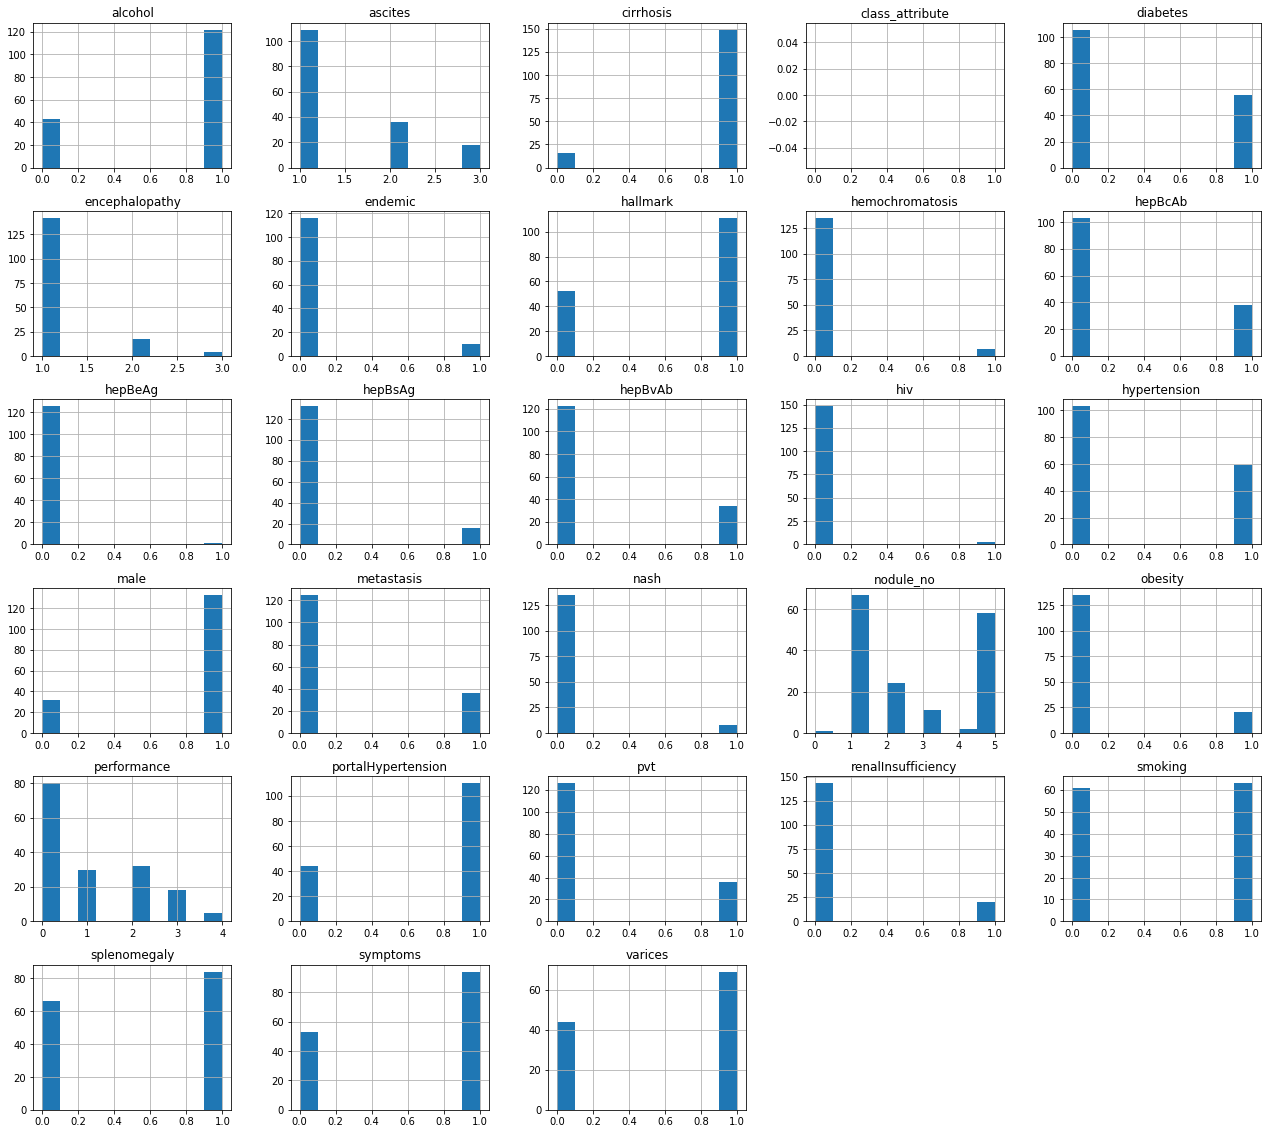

In [15]:
data_Cat.hist(figsize=(22,20))

age                    AxesSubplot(0.125,0.749828;0.133621x0.130172)
alcohol_g           AxesSubplot(0.285345,0.749828;0.133621x0.130172)
smoking_pack         AxesSubplot(0.44569,0.749828;0.133621x0.130172)
inr                 AxesSubplot(0.606034,0.749828;0.133621x0.130172)
afp                 AxesSubplot(0.766379,0.749828;0.133621x0.130172)
hb                     AxesSubplot(0.125,0.593621;0.133621x0.130172)
mcv                 AxesSubplot(0.285345,0.593621;0.133621x0.130172)
leuk                 AxesSubplot(0.44569,0.593621;0.133621x0.130172)
plt                 AxesSubplot(0.606034,0.593621;0.133621x0.130172)
albumin             AxesSubplot(0.766379,0.593621;0.133621x0.130172)
bilirubin_total        AxesSubplot(0.125,0.437414;0.133621x0.130172)
alt                 AxesSubplot(0.285345,0.437414;0.133621x0.130172)
ast                  AxesSubplot(0.44569,0.437414;0.133621x0.130172)
ggt                 AxesSubplot(0.606034,0.437414;0.133621x0.130172)
alp                 AxesSubplot(0.

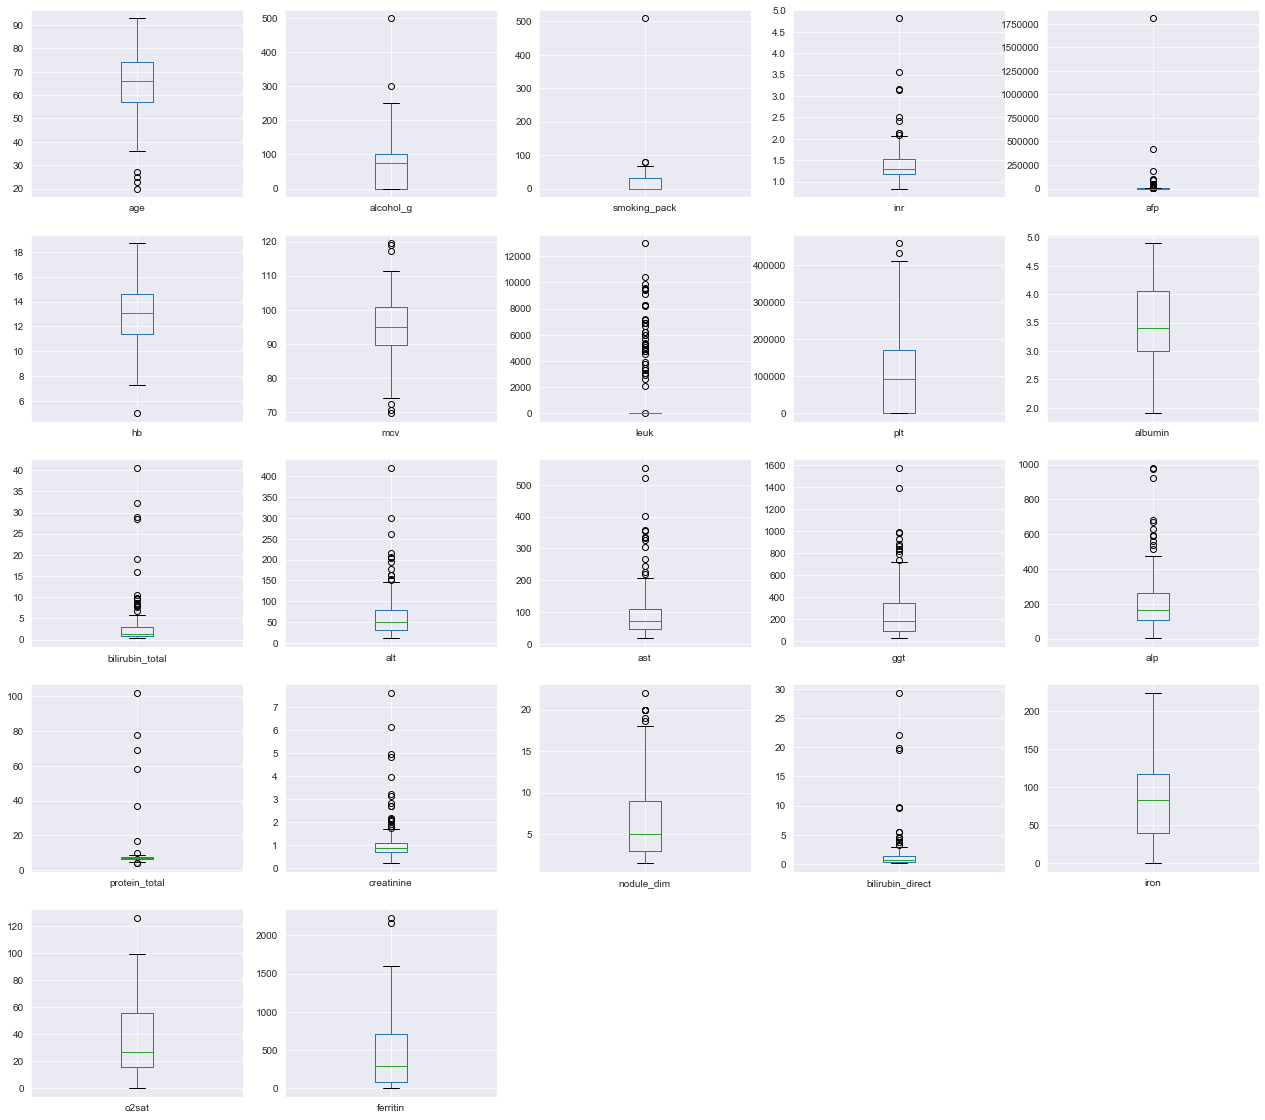

In [66]:
data_Cont.plot(kind='box', subplots=True, layout=(5,5), figsize=(22,20))

# Correlation matrix

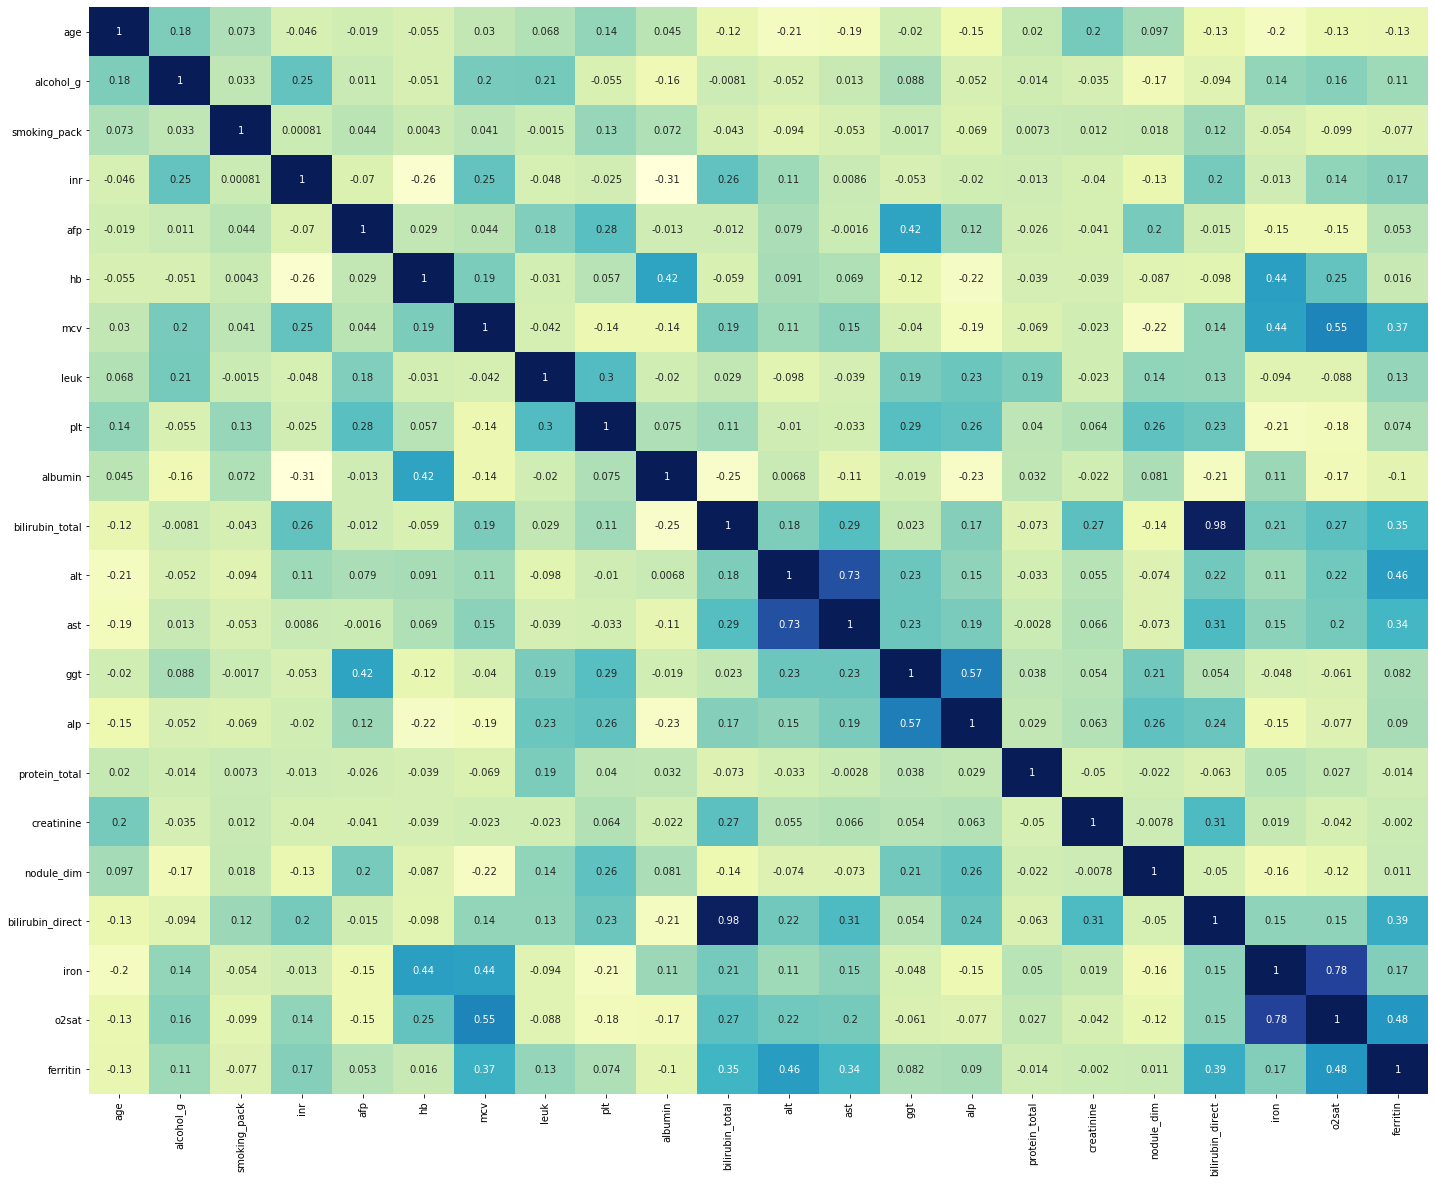

In [42]:
corr = data_Cont.corr()
ax2 = sns.heatmap(corr, annot = True, cmap="YlGnBu", cbar=False)
plt.setp(ax2.axes.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize']=(24,20)

# Survival prevalence

In [18]:
data['lives'].value_counts()

1    102
0     63
Name: lives, dtype: int64

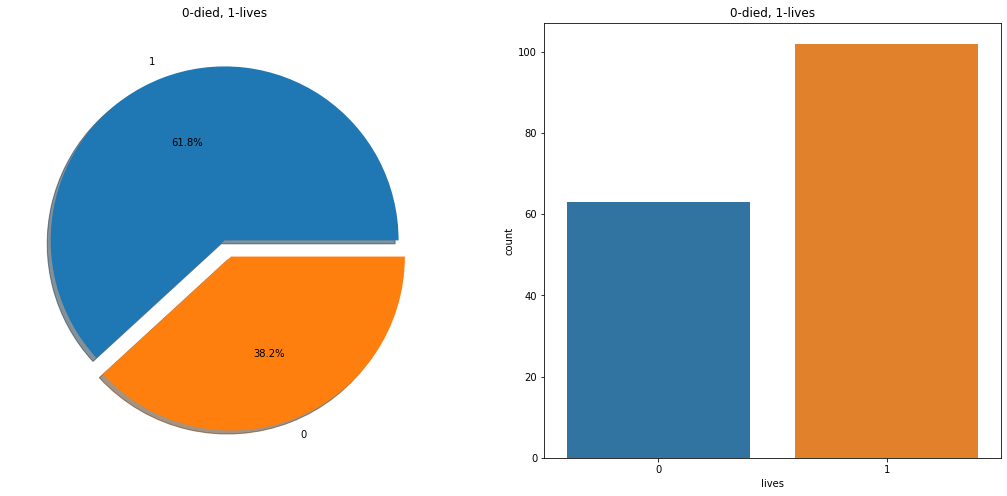

In [19]:
f, ax=plt.subplots(
    1,
    2,
    figsize=(18,8)
)

data['lives'].value_counts().plot.pie(
    explode=[0,0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)

ax[0].set_title('0-died, 1-lives')
ax[0].set_ylabel('')

sns.countplot(
    'lives',
    data=data,ax=ax[1]
)

ax[1].set_title('0-died, 1-lives')

plt.show()

##### Age vs. survival

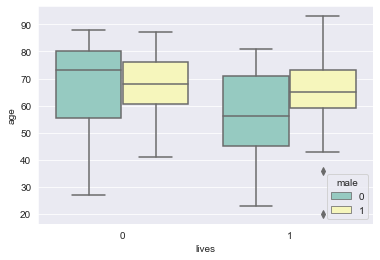

In [30]:
sns.boxplot(x="lives", y="age", hue="male",
...                  data=data, palette="Set3")

##### Gender vs. survival

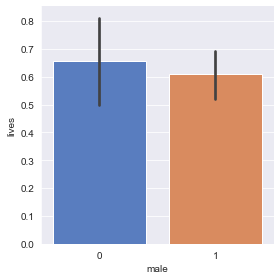

In [53]:
sns.catplot(x="male", y="lives", data=data,
                height=4, kind="bar", palette="muted")

# Missing data

In [51]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)

print(missing_data)

                    Total   Percent
ferritin               80  0.484848
o2sat                  80  0.484848
iron                   79  0.478788
smoking_pack           53  0.321212
varices                52  0.315152
alcohol_g              48  0.290909
bilirubin_direct       44  0.266667
smoking                41  0.248485
endemic                39  0.236364
hepBeAg                39  0.236364
hepBcAb                24  0.145455
hemochromatosis        23  0.139394
nash                   22  0.133333
nodule_dim             20  0.121212
symptoms               18  0.109091
hepBsAg                17  0.103030
splenomegaly           15  0.090909
hiv                    14  0.084848
protein_total          11  0.066667
portalHypertension     11  0.066667
obesity                10  0.060606
hepBvAb                 9  0.054545
afp                     8  0.048485
creatinine              7  0.042424
albumin                 6  0.036364
bilirubin_total         5  0.030303
metastasis              4  0

6 variables have complete data: male, alcohol, cirrhosis, age, and survival

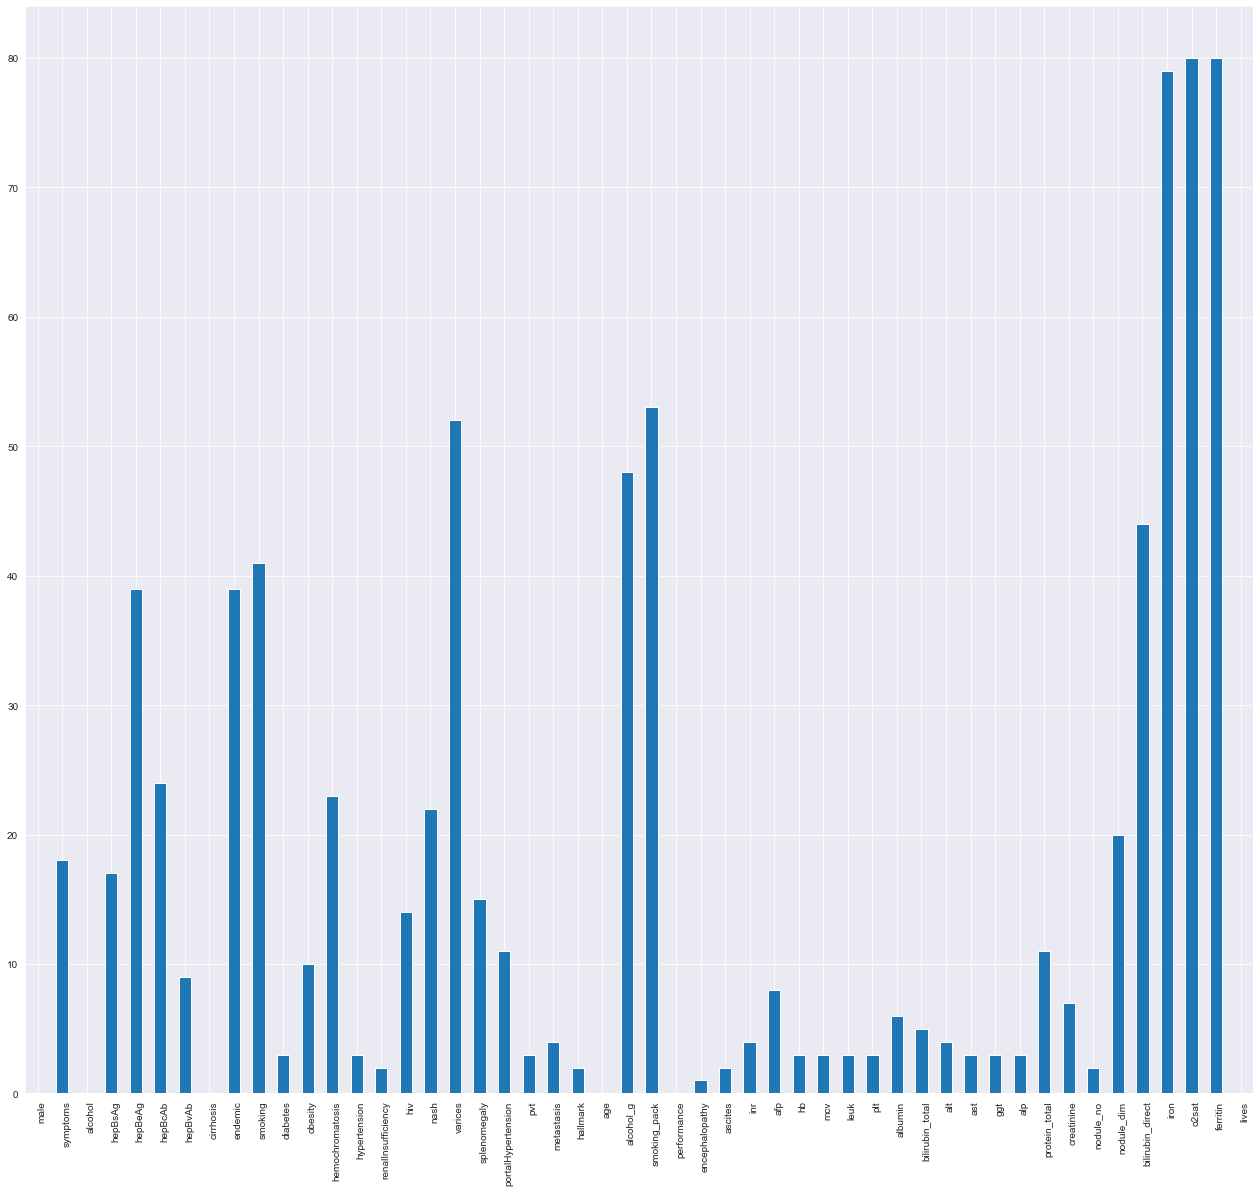

In [50]:
cons = data.loc[:, :]
cons['null_values'] = cons.isnull().sum(axis=1)
null_values = cons.drop('null_values', axis=1).isnull().sum()
sns.set_style("darkgrid")
plt.figure(figsize=(22,20))
pbar = null_values.plot.bar()


plt.xticks(
    rotation=90, 
    ha='left'
)


plt.show()

ferritin, o2sat, and iron, smoking_pack, and varices have the most missing data